Collection of implemented Algorithms for the SS25 lecture algorithm techniques

# Coloring graph with n Colors

Every node of a graph should be colored with one of n colors. No adjacent nodes should be matching the same color.

In [ ]:
import networkx as nx

# Create the graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0)])

c = 2

colors = [-1 for _ in G.nodes()]

def check_color(graph, i, color):
    for neighbor in graph.adj[i]:
        if colors[neighbor] == color:
            return False
    return True

def coloring(graph, c, i):

    # sobald die maximale laenge des graphen erreicht wurde 
    # ein erfolgreiches ergebnis gefunden
    if i == len(graph.nodes):
        return True

    # checke fuer jeden knoten jede moeglich farbe ab ob diese
    # mit den nachbars knoten passt
    for curr_color in range(c):
        if check_color(graph, i, curr_color):
            # wenn farbe passt setzte colors array an index i auf die 
            # passende farbe
            colors[i] = curr_color
            print(f"setting color {curr_color} to node {i}")

            if coloring(graph, c, i + 1):
                # rekursiver schritt einen knoten weiter runter
                # falss dieser knoten true returned passt der aktuelle weg
                # und es wird auch true returned
                return True

            # falls coloring False returned wird durch back tracking der fehler weiter
            # hoch gegeben und vom aktuellen knoten wird die farbe wieder resettet 
            # und die naechste verfuegbare farbe curr_color versucht zu applien
            colors[i] = -1

    return False

if coloring(G, c, 0):
    print("Coloring successful:", colors)
else:
    print("No valid coloring found.")


# Dame Problem with Backtracking

- Place n dames on a n x n grid so no dame can attack each other dame.

In [ ]:
import copy


n = 8

matrix = [[0 for _ in range(n)] for _ in range(n)]

queens = ["Q" for _ in range(n)]

max_int = n * n

solutions = []

def is_safe(row, col):

    # Check row
    for c in range(n):
        if matrix[row][c] == "Q":
            return False

    # Check column
    for r in range(n):
        if matrix[r][col] == "Q":
            return False

    # Check top-left to bottom-right diagonal
    r, c = row, col
    while r >= 0 and c >= 0:
        if matrix[r][c] == "Q":
            return False
        r -= 1
        c -= 1

    r, c = row, col
    while r < n and c < n:
        if matrix[r][c] == "Q":
            return False
        r += 1
        c += 1

    # Check top-right to bottom-left diagonal
    r, c = row, col
    while r >= 0 and c < n:
        if matrix[r][c] == "Q":
            return False
        r -= 1
        c += 1

    r, c = row, col
    while r < n and c >= 0:
        if matrix[r][c] == "Q":
            return False
        r += 1
        c -= 1

    return True

def clear_dames():
    for i in range(n):
        for j in range(n):
            if matrix[i][j] == "Q":
                matrix[i][j] = 0
                queens.append("Q")

def print_matrix():
  for _ in range(n):
     print(" - ", end="")
  print("\n")

  for x in matrix:
    for y in x:
      print(" {} ".format(y) ,end="")
    print("\n")

  for _ in range(n):
     print(" - ", end="")
  print("\n")

def queen_problem(matrix, col):
  for i in range(n):
    row = i

    if is_safe(row, col):
      matrix[row][col] = queens.pop()

      if queens:
        queen_problem(matrix, col+1)
      else:
        print("found_solution going deeper")
        print_matrix()
        solutions.append(copy.deepcopy(matrix))

      matrix[row][col] = 0
      queens.append("Q")

queen_problem(matrix, 0)

print(len(solutions))





# Sudoku Solver with Backtracking 

for a given sudoku field with random already given numbers return the single distinct solution using backtracking

In [98]:
board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]

def print_board():
  for row in board:
    for col in row:
      print(" {} ".format(col), end="")
    print()

def contains_empty_fields():
  for row in board:
    for col in row:
      if col == '.':
        return True
  return False

def get_next_empty():
  for x, row in enumerate(board):
    for y, col in enumerate(row):
      if col == '.':
        return x, y

def ok(row, col, num):

  next_row_3_div = row - (row % 3)
  next_col_3_div = col - (col % 3)

  for i in range(3):
    for j in range(3):
      if board[next_row_3_div + i][next_col_3_div + j] == num:
        return False

  if board[row][col] != '.':
    return False

  for curr_col in board[row]:
    for n in curr_col:
      if n == num:
        return False

  for row in board:
    if row[col] == num:
      return False
    
  return True

def sudoku_solver(board):

  row, col = get_next_empty()

  for num in range(1, 10):

    if ok(row, col, str(num)):
      board[row][col] = str(num)

      if contains_empty_fields():
        res = sudoku_solver(board)

        if res:
          return True
        else:
          board[row][col] = "."
      else:
        return True

  return False


sudoku_solver(board)
print_board()

 5  3  4  6  7  8  9  1  2 
 6  7  2  1  9  5  3  4  8 
 1  9  8  3  4  2  5  6  7 
 8  5  9  7  6  1  4  2  3 
 4  2  6  8  5  3  7  9  1 
 7  1  3  9  2  4  8  5  6 
 9  6  1  5  3  7  2  8  4 
 2  8  7  4  1  9  6  3  5 
 3  4  5  2  8  6  1  7  9 


# all strings of length n from k symbols

return all strings of length n from k symbols

In [ ]:
n = 5
symbols = '%*()__+'

solutions = []

def all_strings(curr_string):


  for char in symbols:
    curr_string += char

    if (len(curr_string) < n):
      all_strings(curr_string)
    else:
      print("max recursion depth reached. solution: {}".format(curr_string))
      solutions.append(curr_string)

    curr_string = curr_string[:-1]


all_strings("")
print(len(solutions))


# all Strings of n bits

return all strings that can be built from n bits

In [ ]:
from filecmp import cmp


n = 2

solutions = []

def all_bits(curr_string):

  for i in range(2):
    curr_string+=str(i)

    if (len(curr_string) < n):
      all_bits(curr_string)

    solutions.append(curr_string)
    curr_string = curr_string[:-1]


all_bits("")
print(sorted(solutions, key=len))
print(len(solutions))





# Bin packing Problem

the goal is to fit n packages with a random size into m containers that all of a certain size s.

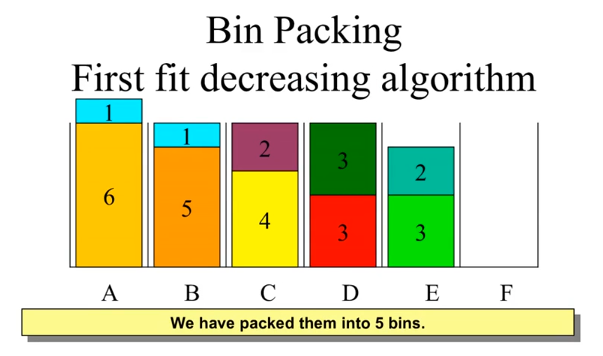

In [ ]:
import copy

packages = [4, 1, 2, 5, 3, 2, 3, 6, 3] # packages with size s

packages = sorted(packages, reverse=True)

print(packages)

containers = [6, 6, 6, 6, 6, 6] # 6 containers with size 6 each
packed_to = [[] for _ in range(len(containers))]
solutions = []
packed_sols = []

def fits(package_size, container_size):
  return container_size >= package_size

def solve(curr_package):
  # print("solving with {} of size {}".format(curr_package, packages[curr_package]))
  package_size = packages[curr_package]

  for index, container in enumerate(containers):

    # print("Trying to fit package {} into container {} with left size of {}".format(curr_package, index, containers[index]))
    if fits(package_size, container):
      containers[index] -= package_size
      packed_to[index].append(package_size)

      if curr_package < len(packages) - 1:
        solve(curr_package + 1)
      else:
        # print("solution found")
        solutions.append(copy.deepcopy(containers))
        packed_sols.append(copy.deepcopy(packed_to))

      containers[index] += package_size
      packed_to[index].pop()

solve(0)

sorted_solutions = sorted(solutions, key=lambda x: x.count(6), reverse=True)
print(sorted_solutions)


# Hamilton Cycle

Ziel ist es einen Hamilton-Zyklus innerhalb eines Graphen zu finden der Algorithmus soll bei erfolgreicher Suche den Weg zurueck geben bei fehlerhafter Suche Error oder False.

Ein Eulerscher Zyklus beschreibt den Weg ueber einen Graphen welcher jeden Knoten überläuft jeden Knoten allerdings nur einmal durchlaufen darf. Start Knoten muss gleich Endknoten sein.

In [ ]:
# Create the graph
graph = {
    0: [1, 4],
    1: [0, 2, 4],
    2: [1, 3],
    3: [2, 4],
    4: [0, 1, 3]
}
path = []
visited = []
start_node = 0

def already_visited(node):
  return node in visited

def is_start_node(node):
  return node == start_node

def hamilton_cycle(graph, curr_node, visited, path):

  for adj in graph[curr_node]:
    path.append(curr_node)
    visited.append(curr_node)
    if not already_visited(adj):

      if hamilton_cycle(graph, adj, visited, path):
        return True
  
    elif(is_start_node(adj) and len(visited) == len(graph.keys())):
      path.append(adj)
      return True
    
    path.pop()
    visited.pop()

  return False


hamilton_cycle(graph, 0, visited, path)
print(path)


# Partition einer Zahl

Ziel ist es von einer beliebigen Zahl n alle möglichen partitionen zu berechnen und zu returnen. \
E.g. n = 3    Mögliche Partitionen = [1 + 1 + 1], [1 + 2], [3] \
E.g. n = 4    Mögliche Partitionen = [1 + 1 + 1 + 1], [1 + 1 + 2], [1 + 3], [2 + 2], [4]

In [51]:
import copy

n = 5

def is_candidate(curr_partition, num):
  return sum(curr_partition + [num]) <= n


def is_successor(curr_partition, num):
  return not curr_partition or curr_partition[-1] <= num

def partition(curr_part, solutions):

  for i in range(1, n + 1):
    if is_candidate(curr_part, i) and is_successor(curr_part, i):
      curr_part.append(i)

      if sum(curr_part) == n:
        solutions.append(copy.deepcopy(curr_part))
      else:
        partition(curr_part, solutions)
      
      curr_part.pop()

  return solutions

sols = partition([], [])
print(sols)

[[1, 1, 1, 1, 1], [1, 1, 1, 2], [1, 1, 3], [1, 2, 2], [1, 4], [2, 3], [5]]


# Hamiltonian Path

Ähnlich zum hamiltonian cycle. Der unterschied ist Start und Endknoten müssen nicht zwingend gleich sein. (Im Endeffekt: Jeder Hamilton-Kreis ist auch ein Hamilton-Pfad, aber nicht jeder Hamilton-Pfad ist ein Kreis.)

In [61]:
# Create the graph
graph = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 4],
    3: [1, 4, 5],
    4: [2, 3, 5],
    5: [3, 4]
}
path = []
visited = []
start_node = 0


def hamilton_path(graph, curr_node, visited, path):

  for i in graph[curr_node]:
    path.append(curr_node)
    visited.append(curr_node)

    if len(visited) == len(graph.keys()):
      print("solution found")
      return path

    if i not in visited:
      return hamilton_path(graph, i, visited, path)

    path.pop()
    visited.pop()

  return []


hamilton_path(graph, 0, [], path)
    
  

solution found


[0, 1, 2, 4, 3, 5]

# Longest connected Cells in Matrix

The goal is to find the longest connected cells of 1's in a matrix containing only 0's and 1's

E.g

Longest connecting cells of 1's are 5 (in the first and second row)

10000 \
01110 \
00010 \
11000 \
10100 

In [146]:
import copy

n = 5

solutions = []

matrix = [
    [1, 0, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1],
    [1, 0, 0, 1, 0]
]



def get_connected_ones(row, col, matrix):
  connected_ones = []

  connected_cords = [
    (row - 1, col),
    (row - 1, col + 1),
    (row - 1, col - 1),
    (row, col - 1),
    (row, col + 1),
    (row + 1, col),
    (row + 1, col + 1),
    (row + 1, col - 1),
  ]

  # print("for cell in row {} and col {} are the folling connected cells defined: ".format(row, col))
  for connected in connected_cords:
    if connected[0] >= 0 and connected[0] < len(matrix) and connected[1] >= 0 and connected[1] < len(matrix[0]) and matrix[connected[0]][connected[1]]:
      connected_ones.append(connected)
      
  return connected_ones




def dfs(matrix, cell, marked, curr_connected, depth, solutions):

  if matrix[cell[0]][cell[1]] and (cell[0], cell[1]) not in marked:
    marked.append((cell[0] , cell[1]))
    curr_connected += 1

    for cell in get_connected_ones(cell[0], cell[1], matrix):
      curr_connected = dfs(matrix, cell,  marked, curr_connected, depth + 1, solutions)

  if depth == 0 and curr_connected != 0:
    # print("returned to first call found solution {}".format(curr_connected))

    solutions.append(copy.deepcopy(curr_connected))
    curr_connected = 0
  else:
    return curr_connected

def connected_ones(matrix):
  solutions = []
  marked = []

  for row in range(len(matrix)):
    for col in range(len(matrix[0])):
      dfs(matrix, (row, col), marked, 0, 0, solutions)

  return solutions


solutions = connected_ones(matrix=matrix)
print(solutions)

[12, 1]


# Springer problem

Ziel ist es alle moeglichen wege eines Springers zu finden mit denen er jeden knoten nur einmal berueren darf. (Basically ein hamiltonian cycle oder so i guess amk kb mehr alter)


!!! Working but returning duplicate solutions !!! (kein bock mehr das zu fixen tbh.)

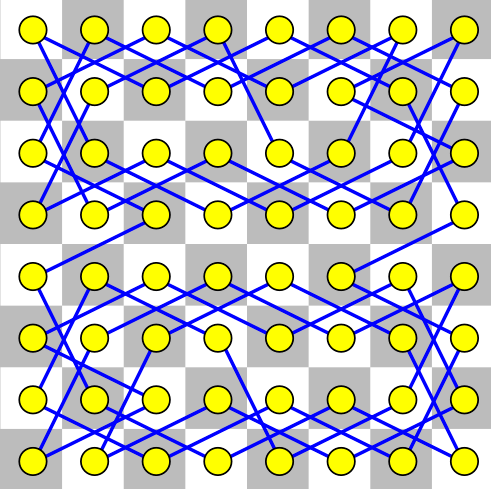

In [ ]:

import copy

def print_matrix(matrix):
  for row in matrix:
    for cell in row:
      print(cell, end="")

    print()



def valid_moves(x, y, matrix, visited):
  valid_moves = []
  possible_moves = [
    (x - 2, y + 1),
    (x - 2, y - 1),
    (x + 2, y + 1),
    (x + 2, y - 1),
    (x + 1, y - 2),
    (x - 1, y - 2),
    (x + 1, y + 2),
    (x - 1, y + 2),
  ]

  for move in possible_moves:
    if move[0] >= 0 and move[0] < n and move[1] >= 0 and move[1] < n:
      valid_moves.append(move)

  return valid_moves


def jumperini_problemini(cell, matrix, visited, solutions, curr_path):


  for move in valid_moves(cell[0], cell[1], matrix, visited):
    # print("moving from {} to cell {}".format(cell, move))
    curr_path.append(cell)
    visited.append(cell)

    if len(visited) == n * n:
      print("found solution {}".format(curr_path))
      solutions.append(copy.deepcopy(visited))

    else:
      if move not in visited:
        jumperini_problemini(move, matrix, visited, solutions, curr_path)
      
    curr_path.pop()
    visited.pop()

n = 5 # matrizen groese
sols = []
m = [[0 for _ in range(n)] for _ in range(n)]

jumperini_problemini((0, 0), m, [], sols, [])

print(sols)
    


Subset Sum  (should be fine but is @TODO)

ziel ist es so bestimmen ob ein gegebenes array ein subset besitzt welches aufaddiert n ergibt.

e.g [1, 3, 20, 13, 12]  n = 4   -> True da [1 + 3] = 4
e.g [1, 20, 3, 5] = n = 22 -> False da kein subset der Zahlen auf gleich 22 kommt

In [ ]:
# not yet implemented (penis c=3)